## Benchmark of fixed-point array arithmetic library
Test platform:
- Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz   1.50 GHz 
- 8GB RAM
- Windows 10 Home
- Python 3.9.5
- Numpy 1.20.3
- MATLAB R2018b
- fxpmath 0.4.0
- numfi 0.2.3

In [1]:
%matplotlib inline
import numpy as np
from fxpmath import Fxp
from numfi import numfi
import matplotlib.pyplot as plt

In [2]:
x = np.random.rand(100000)+1 # +1 to avoid divide by zero
y = np.random.rand(100000)+1 
s,w,f = 1,16,8
nx = numfi(x,s,w,f)
ny = numfi(y,s,w,f)
fx = Fxp(x,s,w,f,rounding='around')
fy = Fxp(y,s,w,f,rounding='around')
# both rounding = np.round, overflow = saturate

### Matlab benchmark code
```matlab
x = rand(1,100000);
y=  rand(1,100000);
s=1;
w=16;
f=8;
fx = fi(x,s,w,f);
fy = fi(y,s,w,f);
time = zeros(1,7);
for i =1:7
    t = tic;
    for j=1:10
        temp = fx .* fy;
    end
    time(i) = toc(t)/10;
end
disp(mean(time)*1000)
```

In [3]:
# fixed point initialization
init_n = %timeit -o nx = numfi(x,s,w,f)
init_f = %timeit -o fx = Fxp(x,s,w,f,rounding='around') 
# matlab 8.8162 ms

692 µs ± 64.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
76.6 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
# fixed point array add float scalar
adds_n = %timeit -o nx + np.pi
adds_f = %timeit -o fx + np.pi 
# matlab: 27.7660 ms

# fixed point array add float array
adda_n = %timeit -o nx + x
adda_f = %timeit -o fx + x
# matlab: 35.5236 ms

# fixed point array add fixed point array
addf_n = %timeit -o nx + ny 
addf_f = %timeit -o fx + fy 
# matlab: 26.6056 ms

76.4 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.5 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
704 µs ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
145 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.9 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.4 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
# fixed point array sub float scalar
subs_n = %timeit -o nx - np.pi 
subs_f = %timeit -o fx - np.pi 
# matlab: 26.0436 ms

# fixed point array sub float array
suba_n = %timeit -o nx - x 
suba_f = %timeit -o fx - x 
# matlab: 29.7733 ms

# fixed point array sub fixed point array
subf_n = %timeit -o nx - ny 
subf_f = %timeit -o fx - fy 
# matlab: 26.8947 ms

76.8 µs ± 993 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
682 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
144 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
63 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
75 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
# fixed point array mul float scalar
muls_n = %timeit -o nx * np.pi 
muls_f = %timeit -o fx * np.pi 
# matlab: 18.0494 ms

# fixed point array mul float array
mula_n = %timeit -o nx * x 
mula_f = %timeit -o fx * x 
# matlab: 26.2648 ms

# fixed point array mul fixed point array
mulf_n = %timeit -o nx * ny
mulf_f = %timeit -o fx * fy
# matlab: 17.8751 ms

79.7 µs ± 832 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74.7 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
732 µs ± 34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
152 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.1 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74.4 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# fixed point array div float scalar
divs_n = %timeit -o nx / np.pi 
divs_f = %timeit -o fx / np.pi 
# matlab: 49.5426 ms

# fixed point array div float array
diva_n = %timeit -o nx / x 
diva_f = %timeit -o fx / x 
# matlab: 61.5865 ms 

# fixed point array div fixed point array
divf_n = %timeit -o nx / ny 
divf_f = %timeit -o fx / fy 
# matlab: 56.3831 ms 

861 µs ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
73.1 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.09 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
146 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
948 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
73.8 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
# fixed point array do logical operation
logic_n = %timeit -o nx >= 0.5
logic_f = %timeit -o fx >= 0.5
# matlab 1.1448 ms

24 µs ± 840 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
125 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
# fixed point array do trigonometric operation
sin_n = %timeit -o np.sin(nx) 
sin_f = %timeit -o np.sin(fx) 
# matlab timeout

726 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.25 s ± 799 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# fixed point array do reduce operation
sum_n = %timeit -o nx.sum() 
sum_f = %timeit -o fx.sum() 
# matlab 49.1531 ms

55.7 µs ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
293 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# fixed point array do fft
fft_n = %timeit -o np.fft.fft(nx)
fft_f = %timeit -o np.fft.fft(fx)
# matlab: 2.127 ms

4.61 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.5 s ± 414 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# fixed point array do convolution
filter = np.random.rand(256)
nf = numfi(filter,like=nx)
ff = Fxp(filter, 1,16,8,rounding='around')
conv_n = %timeit -o np.convolve(nx,nf)
conv_f = %timeit -o np.convolve(fx,ff)
# matlab: timeout

3.87 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.58 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
benchmark_label = ['init',
'add float scalar', 'add float array', 'add fixed array',
'sub float scalar', 'sub float array', 'sub fixed array',
'mul float scalar', 'mul float array', 'mul fixed array',
'div float scalar', 'div float array', 'div fixed array',
'logical', 'sin()', 'sum()', 'fft()', 'convolve()-256'
]

benchmark_time = np.array([
    [i.average for i in [init_n,adds_n,adda_n,addf_n,subs_n,suba_n,subf_n,muls_n,mula_n,mulf_n,divs_n,diva_n,divf_n,logic_n,sin_n,sum_n,fft_n,conv_n]], # numfi time
    [i.average for i in [init_f,adds_f,adda_f,addf_f,subs_f,suba_f,subf_f,muls_f,mula_f,mulf_f,divs_f,diva_f,divf_f,logic_f,sin_f,sum_f,fft_f,conv_f]], # fxpmath time
    [8.8162e-3,27.7660e-3,35.5236e-3,26.6056e-3,26.0436e-3,29.7733e-3,26.8947e-3,18.0494e-3,26.2648e-3,17.8751e-3,49.5426e-3,61.5865e-3,56.3831e-3,1.1448e-3,np.inf,49.1531e-3,2.127e-3,np.inf] # matlab time
])*1000 

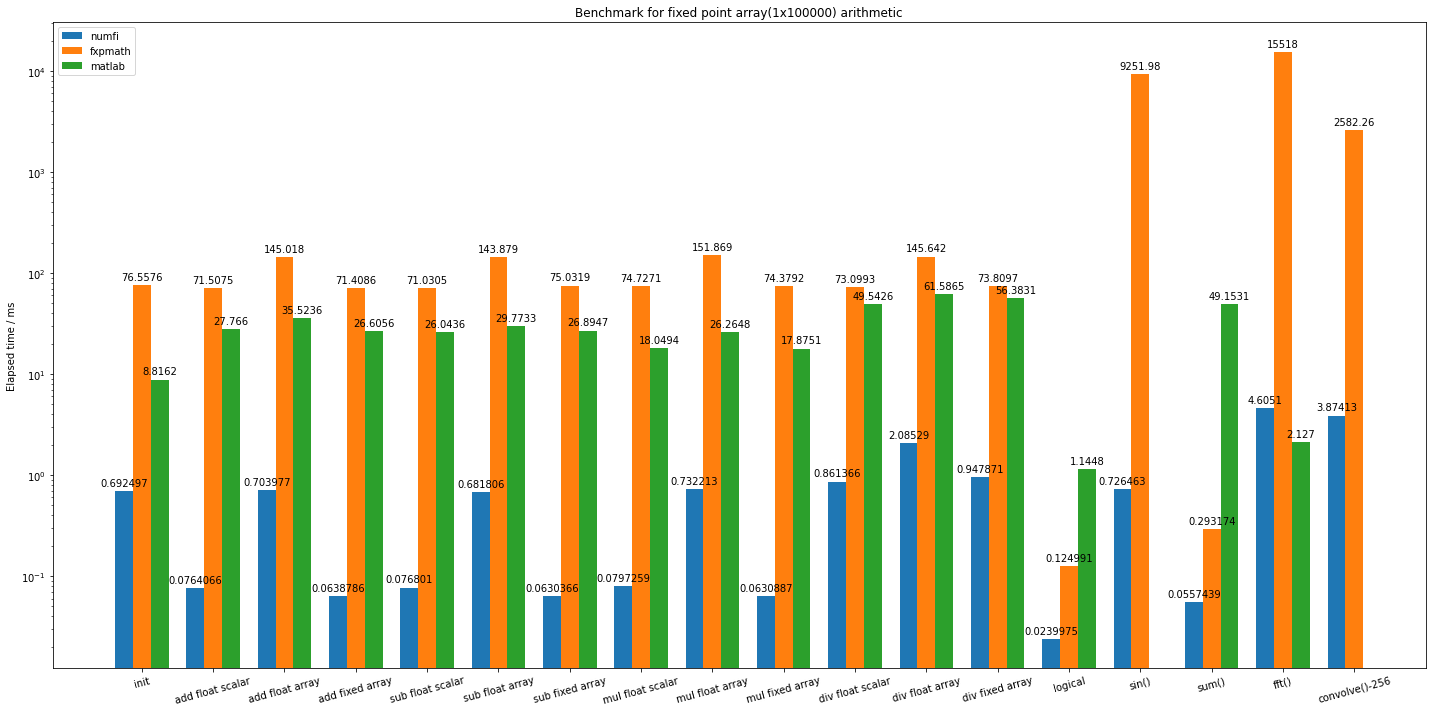

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
x = np.arange(len(benchmark_label))
w = 0.25
bar_numfi = ax.bar(x-w, benchmark_time[0], w, label='numfi')
bar_fxp = ax.bar(x, benchmark_time[1], w, label='fxpmath')
bar_matlab = ax.bar(x+w, benchmark_time[2], w, label='matlab')
ax.set_ylabel("Elapsed time / ms")
ax.set_yscale('log')
ax.set_title("Benchmark for fixed point array(1x100000) arithmetic")
ax.set_xticks(x)
ax.set_xticklabels(benchmark_label, rotation=15)
ax.legend()
ax.bar_label(bar_numfi,padding=3)
ax.bar_label(bar_fxp,padding=3)
ax.bar_label(bar_matlab,padding=3)
fig.tight_layout()
plt.savefig('./docs/benchmark.jpg')
plt.show()
